In [82]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

abspath = os.path.abspath(os.getcwd())
finpath = Path(abspath).resolve().parent.parent

batting = pd.read_csv(str(finpath) + '/storage/fangraphs/batting')

In [83]:
batting = batting.query('PA > 250 and Season > 2005')
batting = batting.dropna(axis=1)
print(batting)

      Unnamed: 0   IDfg  Season              Name   Team  Age    G   AB   PA  \
0           1235  17982    2021         Ty France    SEA   26  152  571  650   
1           2278   8202    2021     Josh Harrison  - - -   33  138  505  558   
2           1057   7304    2021    Salvador Perez    KCR   31  161  620  665   
3            948  19198    2021      Yuli Gurriel    HOU   37  143  530  605   
4           1120   5417    2021       Jose Altuve    HOU   31  146  601  678   
...          ...    ...     ...               ...    ...  ...  ...  ...  ...   
2321         348    255    2006      Frank Thomas    OAK   38  137  466  559   
2322        2352    320    2006  Juan Encarnacion    STL   30  153  557  598   
2323        2631    549    2006      Craig Biggio    HOU   40  145  548  607   
2324        1767   1101    2006     Ichiro Suzuki    SEA   32  161  695  752   
2325        1316   1197    2006        Emil Brown    KCR   31  147  527  601   

        H  ...  HR/FB%+  Pull%+  Cent%+

In [96]:
wRC = batting["wRC"]
features = batting.drop(columns=["wRC"])
numerical_features = [f for f in features.columns if features.dtypes[f] != 'object']

<AxesSubplot:title={'center':'Log Normal'}, xlabel='wOBA'>

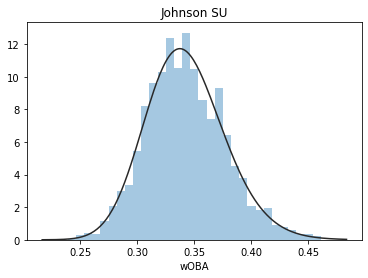

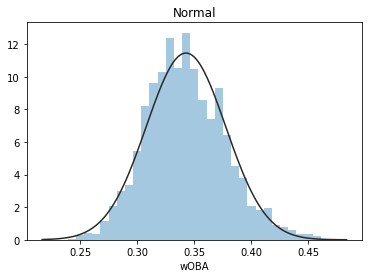

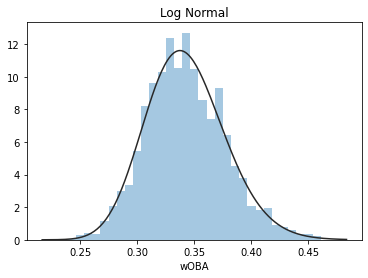

In [95]:
plt.figure(1); plt.title('Johnson SU')
sns.distplot(wRC, kde=False, fit=stats.johnsonsu)

plt.figure(2); plt.title('Normal')
sns.distplot(wRC, kde=False, fit=stats.norm)

plt.figure(3); plt.title('Log Normal')
sns.distplot(wRC, kde=False, fit=stats.lognorm)

#It appears from this visualization that wRC is approximately log normally distributed,
#which makes sense as we eventually want to normalize wRC to wRC+

In [ ]:
f = pd.melt(batting, value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

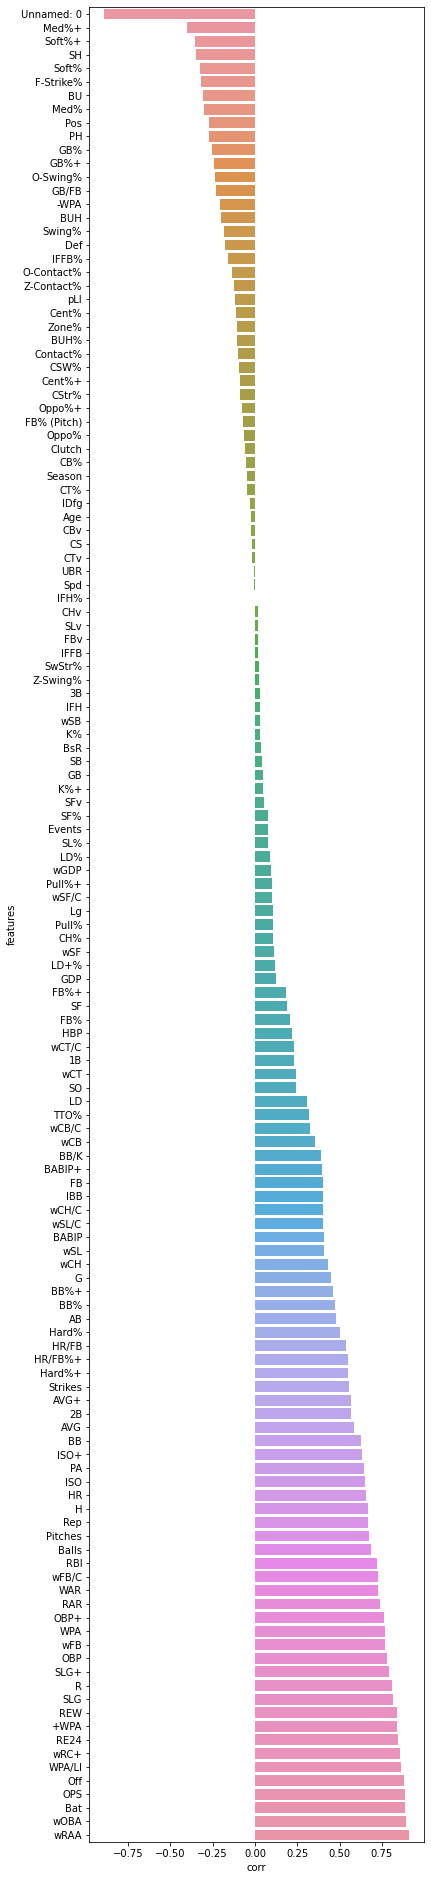

In [103]:
def compute_spearman(wRC, numerical_features, batting):
    df = pd.DataFrame()
    features = numerical_features
    df["features"] = features
    df["corr"] = [batting[f].corr(wRC, 'spearman') for f in numerical_features]
    df = df.sort_values('corr')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=df, y='features', x='corr', orient='h')

compute_spearman(wRC, numerical_features, batting)